In [53]:
import os
from casadi import *
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [25]:
avg_res_time = 700
current_resource = 1
resource_min = 1
resource_max = 4

num_mal = 100
num_sus = 30
num_norm = 30

rate_mal = 2
rate_sus = 1
rate_norm = 0.5

In [164]:
list_response_time = [ 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]
list_num_mal = [0, 6, 15, 25, 40, 60, 91, 140, 240, 540]
list_per_mal = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [108]:
max_nobs = []
for r in list_response_time:
    for m in list_num_mal:
        max_delta_mal = r*(m*rate_mal)/(m*rate_mal+num_sus*rate_sus+num_norm*rate_norm)
        if  max_delta_mal > r-200:
            max_delta_mal = r-200
        if max_delta_mal == 0:
            max_delta_mal = 1

        max_resource = r*(1-current_resource/resource_max)
        if  max_resource > r-200:
            max_resource = r-200

        max_delta_limit = r*(m*(rate_mal-rate_norm)+num_sus*(rate_sus-rate_norm))/(m*rate_mal+num_sus*rate_sus+num_norm*rate_norm)
        if  max_delta_limit > r-200:
            max_delta_limit = r-200

        print(r)
        print(max_delta_mal)
        print(max_resource)
        print(max_delta_limit)
        max_nobs.append(max_delta_mal)
        max_nobs.append(max_resource)
        max_nobs.append(max_delta_limit)

400
1
200
133.33333333333334
400
84.21052631578948
200
168.42105263157896
400
160.0
200
200.0
400
200
200
200
400
200
200
200
400
200
200
200
400
200
200
200
400
200
200
200
400
200
200
200
400
200
200
200
800
1
600.0
266.6666666666667
800
168.42105263157896
600.0
336.8421052631579
800
320.0
600.0
400.0
800
421.05263157894734
600.0
442.10526315789474
800
512.0
600.0
480.0
800
581.8181818181819
600.0
509.09090909090907
800
600
600.0
533.920704845815
800
600
600.0
553.8461538461538
800
600
600.0
571.4285714285714
800
600
600.0
586.6666666666666
1200
1
900.0
400.0
1200
252.6315789473684
900.0
505.2631578947368
1200
480.0
900.0
600.0
1200
631.578947368421
900.0
663.1578947368421
1200
768.0
900.0
720.0
1200
872.7272727272727
900.0
763.6363636363636
1200
962.114537444934
900.0
800.8810572687224
1200
1000
900.0
830.7692307692307
1200
1000
900.0
857.1428571428571
1200
1000
900.0
880.0
1600
1
1200.0
533.3333333333334
1600
336.8421052631579
1200.0
673.6842105263158
1600
640.0
1200.0
800.0
1600
8

In [173]:
with open('plan.txt') as f:
    control_nobs = f.read().splitlines()

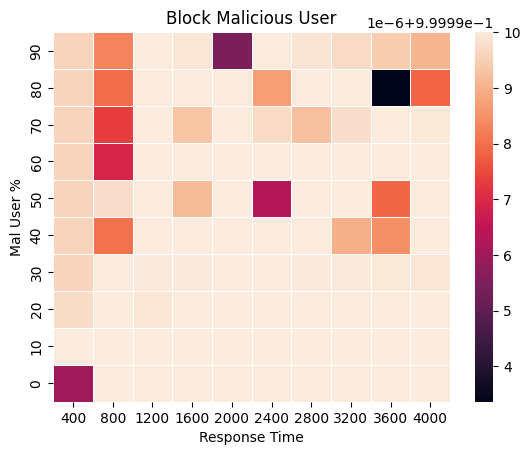

In [174]:
data = np.zeros(shape=(10,10), dtype=float)
i=0
for r in range(10):
    for m in range(10):
        if float(max_nobs[i]) != 0:
            data[m,r]=float(control_nobs[i])/float(max_nobs[i])
        else:
            data[m,r]=0
        i = i + 3
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(data, linewidth=0.5,yticklabels=list_per_mal, xticklabels=list_response_time)
ax.invert_yaxis()
plt.title('Block Malicious User')
plt.xlabel('Response Time')
plt.ylabel('Mal User %')
plt.show()

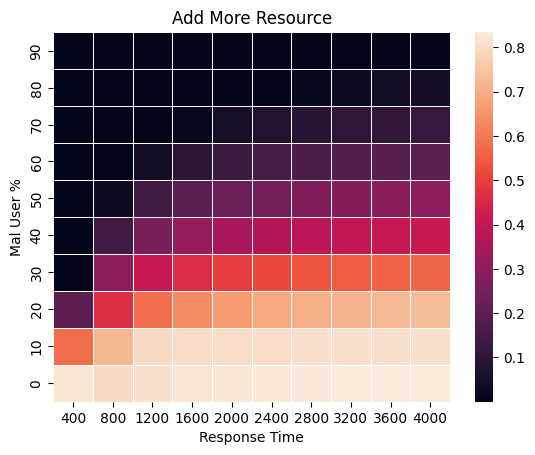

In [175]:
data = np.zeros(shape=(10,10), dtype=float)
i=1
for r in range(10):
    for m in range(10):
        if float(max_nobs[i]) != 0:
            data[m,r]=float(control_nobs[i])/float(max_nobs[i])
        else:
            data[m,r]=0
        i = i + 3
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(data, linewidth=0.5,yticklabels=list_per_mal, xticklabels=list_response_time)
ax.invert_yaxis()
plt.title('Add More Resource')
plt.xlabel('Response Time')
plt.ylabel('Mal User %')
plt.show()

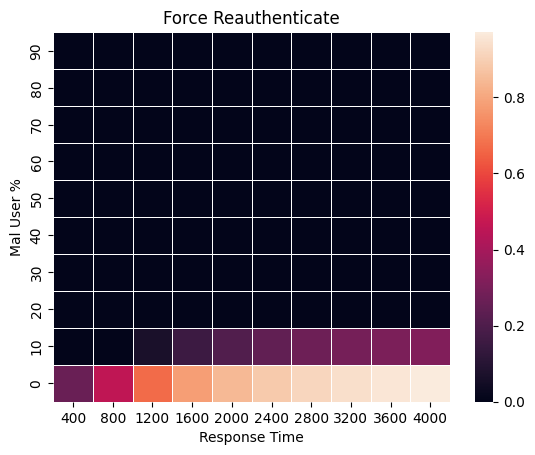

In [176]:
data = np.zeros(shape=(10,10), dtype=float)
i=2
for r in range(10):
    for m in range(10):
        if float(max_nobs[i]) != 0:
            data[m,r]=float(control_nobs[i])/float(max_nobs[i])
        else:
            data[m,r]=0
        i = i + 3
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(data, linewidth=0.5,yticklabels=list_per_mal, xticklabels=list_response_time)
ax.invert_yaxis()
plt.title('Force Reauthenticate')
plt.xlabel('Response Time')
plt.ylabel('Mal User %')
yticklabels = list_response_time
plt.show()

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      100
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1275

Total number of variables............................:       50
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       50
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  8.0000000e+00 6.00e+00 2.18e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

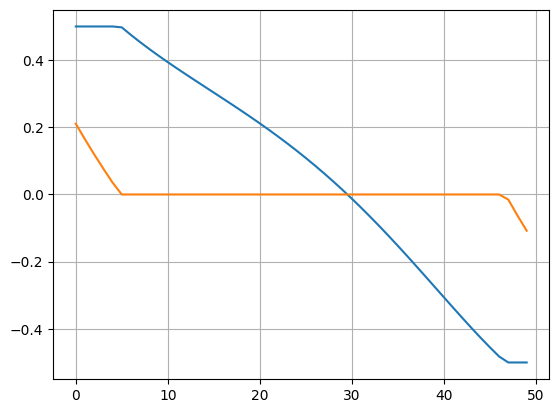

In [18]:

# Control
u = MX.sym("u")

# State
x = MX.sym("x",3)
s = x[0] # position
v = x[1] # speed
m = x[2] # mass

# ODE right hand side
sdot = v
vdot = (u - 0.05 * v*v)/m
mdot = -0.1*u*u
xdot = vertcat(sdot,vdot,mdot)

# ODE right hand side function
f = Function('f', [x,u],[xdot])

# Integrate with Explicit Euler over 0.2 seconds
dt = 0.01  # Time step
xj = x
for j in range(20):
  fj = f(xj,u)
  xj += dt*fj

# Discrete time dynamics function
F = Function('F', [x,u],[xj])

# Number of control segments
nu = 50 

# Control for all segments
U = MX.sym("U",nu) 
 
# Initial conditions
X0 = MX([0,0,1])

# Integrate over all intervals
X=X0
for k in range(nu):
  X = F(X,U[k])

# Objective function and constraints
J = mtimes(U.T,U) # u'*u in Matlab
G = X[0:2]     # x(1:2) in Matlab

# NLP
nlp = {'x':U, 'f':J, 'g':G}
 
# Allocate an NLP solver
opts = {"ipopt.tol":1e-10, "expand":True}
solver = nlpsol("solver", "ipopt", nlp, opts)
arg = {}

# Bounds on u and initial condition
arg["lbx"] = -0.5
arg["ubx"] =  0.5
arg["x0"] =   0.4

# Bounds on g
arg["lbg"] = [10,0]
arg["ubg"] = [10,0]

# Solve the problem
res = solver(**arg)

# Get the solution
plt.plot(res["x"])
plt.plot(res["lam_x"])
plt.grid()
plt.show()